## Module Imports

In [1]:
import psycopg2 as db
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
from config import host,database,user,password

## Import SQL database into pandas

In [2]:
conn = db.connect(host=host,database=database, user=user, password=password)
sql = "select * from vEmployeeData"
data = sqlio.read_sql_query(sql, conn)
conn = None

In [3]:
# this may take a while
data

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,13616,e0003,2061-08-30,Perry,Lorho,F,1991-08-03,Senior Engineer,40000.0
1,240129,e0004,2052-08-11,Roddy,Karnin,M,1985-05-29,Technique Leader,43548.0
2,43471,e0002,2064-01-10,Mechthild,Gihr,F,1995-05-10,Engineer,40023.0
3,444985,s0001,2056-01-20,Giap,Verspoor,F,1990-03-17,Staff,71042.0
4,492723,e0003,2059-09-30,Piyawadee,Sanella,M,1987-07-11,Senior Engineer,46740.0
...,...,...,...,...,...,...,...,...,...
300019,224534,e0003,2064-02-28,Adib,Porenta,F,1987-06-03,Senior Engineer,46695.0
300020,49941,e0003,2060-10-31,Navid,Kuzuoka,M,1986-04-27,Senior Engineer,41371.0
300021,433619,e0003,2059-02-26,Youssef,Valiente,F,1987-06-02,Senior Engineer,40000.0
300022,222402,s0001,2055-03-03,Jaana,Klyachko,F,1991-01-11,Staff,40000.0


## Create a histogram to visualize the most common salary ranges for employees

Text(0.5, 0, 'Salary Range')

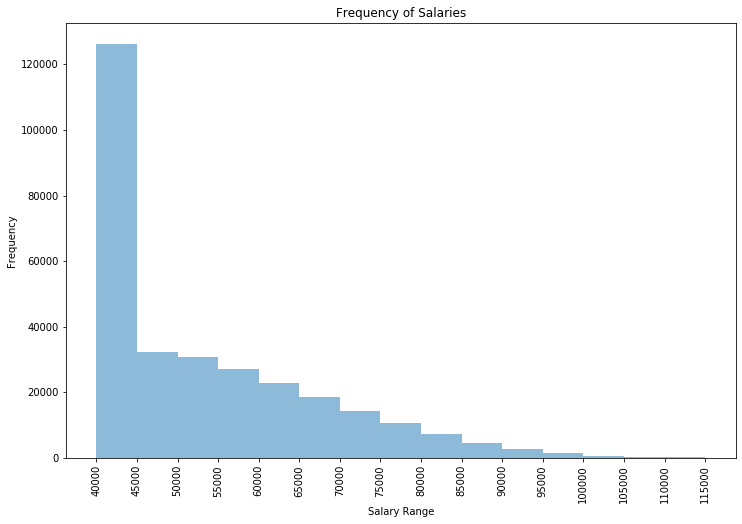

In [4]:
salary = data["salary"]

salary_list = 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000

ax = salary.plot.hist(bins=salary_list, alpha=0.5, figsize=(12, 8),rot=90)
plt.xticks(salary_list)
ax.set_title("Frequency of Salaries")
ax.set_xlabel("Salary Range")

 ## Create a bar chart of average salary by title

Text(0, 0.5, 'Salary Range')

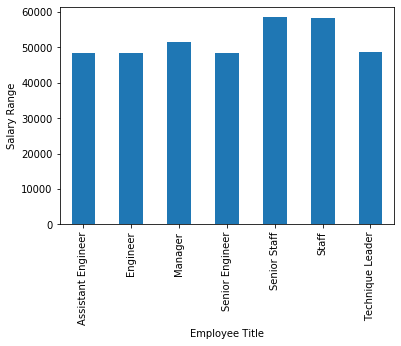

In [5]:
averageSalaryByTitle = data.groupby("title").mean()["salary"].reset_index()
ax = averageSalaryByTitle.plot.bar(x="title", y="salary", rot=90, legend=False)
ax.set_xlabel("Employee Title")
ax.set_ylabel("Salary Range")